# Przetwarzanie obrazów w dziedzinie przestrzennej
## Ćwiczenie 5
### 5.1 wyświetlanie obrazu wczytanego z pliku o podanej nazwie

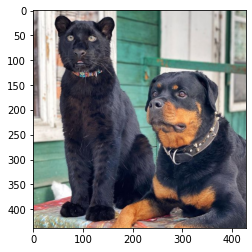

In [59]:

from matplotlib import pyplot as plt
img_name = 'image.png'
img = plt.imread(img_name)
plt.imshow(img)

### 5.2 sporządzenie wykresów zmian poziomu szarości wzdłuż wybranej linii poziomej        lub pionowej o zadanej współrzędnej

Text(0.5, 1.0, 'Wykres zmian poziomu szarości\nwzdłuż kolumny o indeksie 100')

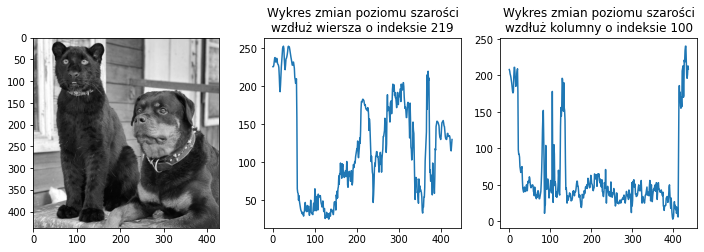

In [60]:

import cv2

gray_img = cv2.cvtColor(cv2.imread(img_name), cv2.COLOR_BGR2GRAY)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3,figsize=(12,3.5))
ax1.imshow(gray_img, cmap='gray')

rows_colums_xy = gray_img.shape
row_index = rows_colums_xy[0] // 2 
row = gray_img[row_index]
ax2.plot(list(range(rows_colums_xy[1])), row)
ax2.set_title(f"Wykres zmian poziomu szarości\nwzdłuż wiersza o indeksie {row_index}")

import numpy as np
column_index = 100
column = np.take(gray_img, column_index, axis=1)
ax3.plot(list(range(rows_colums_xy[0])), column)
ax3.set_title(f"Wykres zmian poziomu szarości\nwzdłuż kolumny o indeksie {column_index}")


### 5.3 wybór podobrazu (prostokątnego obszaru) o podanych współrzędnych oraz jego zapis do pliku o zadanej nazwie.

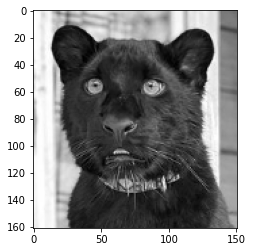

In [61]:
y = 30
x = 0
y2 = 180
x2 = 160
img_to_save = np.array([])
for i in range(x,x2+1):
    row = np.array(gray_img[i][y:y2+1])
    if i == x:
        img_to_save = row.copy()
        continue
    img_to_save = np.vstack((img_to_save, row))
plt.imsave('nazwa.jpg', img_to_save, format='jpg', cmap='gray')
img_to_save.shape
plt.imshow(img_to_save, cmap='gray')
# easier way
crop =  gray_img[x:x2,y:y2]
# plt.imshow(crop, cmap='gray')



## Ćwiczenie 6
### 6.1 Mnożenie obrazu przez stałą T(r) = c · r, gdzie c jest stałą.
Obraz po pomnożeniu został znormalizowany

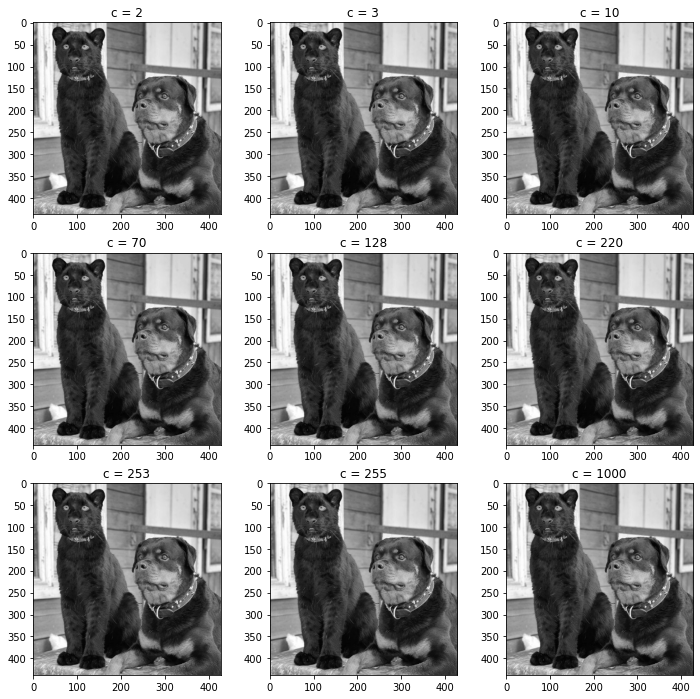

In [62]:

fig, axs = plt.subplots(3,3,figsize=(12,12))
c = [2, 3, 10, 70, 128, 220, 253, 255, 1000]

g128 = gray_img.astype(np.float128)

for x in range(0,9):
    plt.subplot(3,3,x+1)
    axs[ x // 3 ,x%3].set_title(f'c = {c[x]}')
    g128 = g128*c[x]
    min = np.amin(g128)
    max = np.amax(g128)
    g8 = (((g128 - min) * (1/max))* 255).astype('uint8')
    plt.imshow(g8, cmap='gray',vmin=0,vmax=255)


Po pomnożenia wartości przekraczające (0,L-1) zostały zredukowane odpowiednio do 0, L-1, efekt jest zgodny z oczekiwaniami

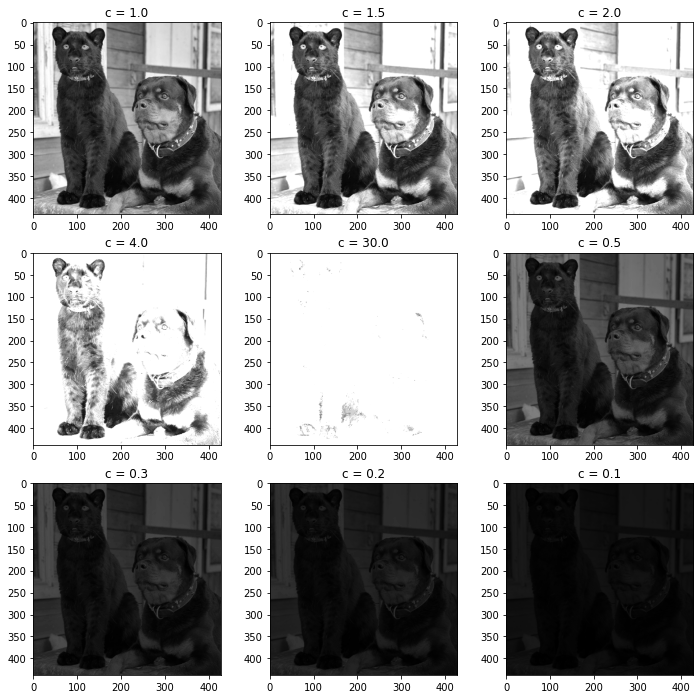

In [63]:
fig, axs = plt.subplots(3,3,figsize=(12,12))
c = [1., 1.5, 2., 4., 30., 0.5, 0.3, 0.2, 0.1]


for x in range(0,9):
    plt.subplot(3,3,x+1)
    axs[ x // 3 ,x%3].set_title(f'c = {c[x]}')
    g128 = gray_img.astype(np.float128)
    g128 = np.clip(g128 * c[x],0,255)
    g8 = g128.astype('uint8')
    plt.imshow(g8, cmap='gray',vmin=0,vmax=255)

In [64]:
### 6.2 Zmiana dynamiki skali szarości (kontrastu). 

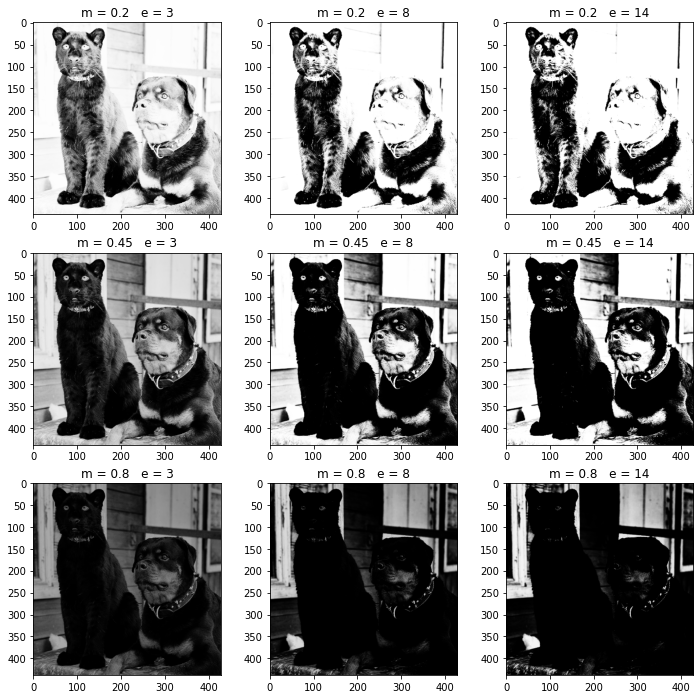

In [65]:
fig, axs = plt.subplots(3,3,figsize=(12,12))
m = [ 0.2, 0.2, 0.2, 0.45, 0.45, 0.45, 0.8, 0.8, 0.8]
e = [3, 8, 14, 3, 8, 14, 3, 8, 14]

def t(val,m,e):
    
    if val == 0: 
        return 0.
    else:
        val = 1 / ( 1 + np.power(m/val,e))
        if  val < 1:
            return val
        else:
            return 1


for x in range(0,9):
    plt.subplot(3,3,x+1)
    axs[ x // 3 ,x%3].set_title(f'm = {m[x]}   e = {e[x]}')
    g = gray_img.astype(np.float64)
    min = np.amin(g)
    max = np.amax(g)
    g = (g - min) * (1/max) # normalize to 0,1

    for z in np.nditer(g, op_flags=['readwrite']):
            z[...]= t(z,m[x],e[x])
   
    plt.imshow(g, cmap='gray',vmin=0,vmax=1.0)

### Wnioski
Dla transformacji o podanej postaci t, stała m steruje graniczną wartością skali szarości, wartości niższe będą rozjasnione, natomiast wyższe przyciemnione. 
Stała e steruje "intensywnoscia" kontrastu im jest wieksza tym rozjasnienie/przyciemnienie bedzie intensywniejsze
https://www.geogebra.org/graphing/awntwsmq

### 6.3 Korekcja gamma
https://www.geogebra.org/graphing/awntwsmq

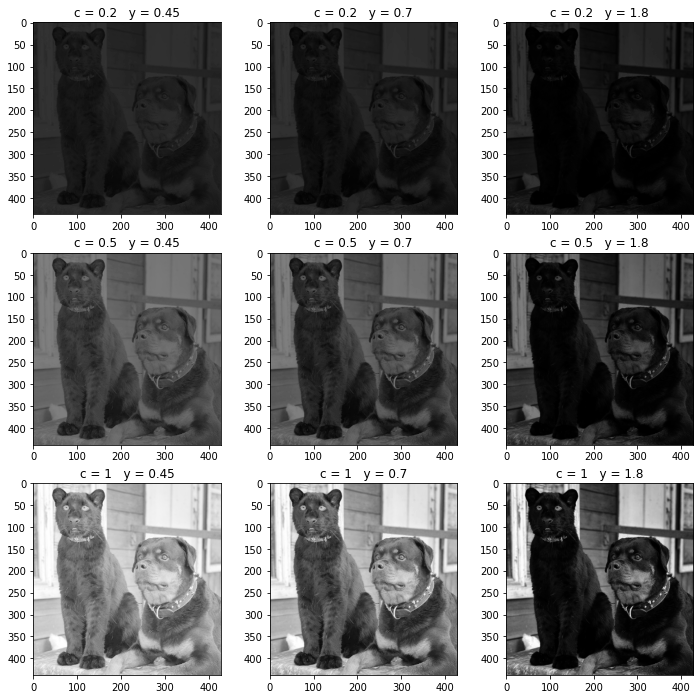

In [66]:
fig, axs = plt.subplots(3,3,figsize=(12,12))
c= [ .2, .2, .2, 0.5, 0.5, 0.5, 1, 1, 1]
y = [0.45,0.7, 1.8,0.45,0.7, 1.8,0.45,0.7, 1.8]

def s(val,c,y):
    val = c * np.power(val,y)
    if val < 1:
        return val
    else:
        return 1


for x in range(0,9):
    plt.subplot(3,3,x+1)
    axs[ x // 3 ,x%3].set_title(f'c = {c[x]}   y = {y[x]}')
    g = gray_img.astype(np.float64)
    min = np.amin(g)
    max = np.amax(g)
    g = (g - min) * (1/max) # normalize to 0,1
    for z in np.nditer(g, op_flags=['readwrite']):
            z[...]= s(z,c[x],y[x])
    if c[x] == 0.2 and y[x] == 1.8:
        plt.imsave('image_too_dark.jpg', g, format='jpg', cmap='gray',vmin=0, vmax=1.0)
    if c[x] == 1 and y[x] == 0.45:
        plt.imsave('image_too_bright.jpg', g, format='jpg', cmap='gray',vmin=0, vmax=1.0)
    plt.imshow(g, cmap='gray',vmin=0,vmax=1.0)

## Ćwiczenie 7
### Wypróbuj działanie wyrównywania histogramu na przykładowych obrazach. 
By zaobserwować skuteczność procedury, poddaj wyrównywaniu obrazy
zbyt ciemne i zbyt jasne. Narysuj histogramy obrazów przed i po wyrównaniu.

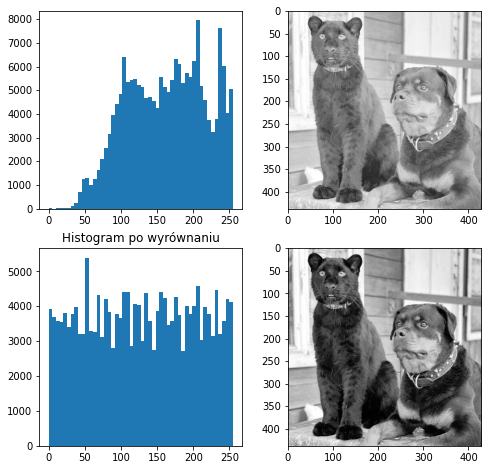

In [67]:

fig, axs = plt.subplots(2,2,figsize=(8,8))
plt.subplot(2,2,1)
img_too_bright = cv2.cvtColor(cv2.imread('image_too_bright.jpg'), cv2.COLOR_BGR2GRAY)
plt.hist(np.ravel(img_too_bright),50,[0,255])
plt.subplot(2,2,2)
plt.imshow(img_too_bright, cmap='gray',vmin=0,vmax=255)
plt.subplot(2,2,3)
bright_eq = cv2.equalizeHist(img_too_bright)
plt.hist(np.ravel(bright_eq),50)
plt.title('Histogram po wyrównaniu')
plt.subplot(2,2,4)
plt.imshow(bright_eq, 'gray',vmin=0,vmax=255)


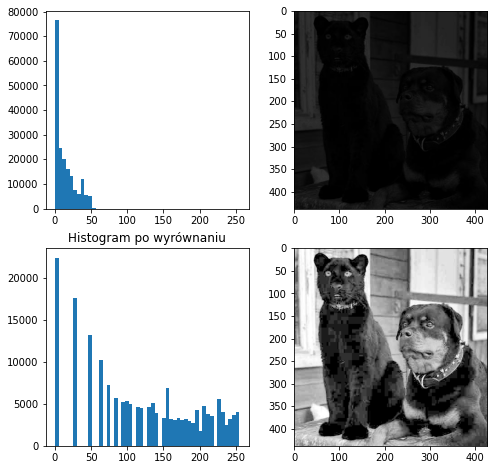

In [68]:
fig, axs = plt.subplots(2,2,figsize=(8,8))
plt.subplot(2,2,1)
img_too_dark = cv2.cvtColor(cv2.imread('image_too_dark.jpg'), cv2.COLOR_BGR2GRAY)
plt.hist(np.ravel(img_too_dark),50,[0,255])
plt.subplot(2,2,2)
plt.imshow(img_too_dark, cmap='gray',vmin=0,vmax=255)
plt.subplot(2,2,3)
dark_eq = cv2.equalizeHist(img_too_dark)
plt.hist(np.ravel(dark_eq),50)
plt.title('Histogram po wyrównaniu')
plt.subplot(2,2,4)
plt.imshow(dark_eq, 'gray',vmin=0,vmax=255)

## Ćwiczenie 8 - Filtracja dolnoprzepustowa
### Zbadaj skuteczność redukcji szumu typu „sól i pieprz” za pomocą
### 8.1 liniowego filtra uśredniającego z kwadratową maską, rozpoczynając od maski rozmiaru 3 × 3.

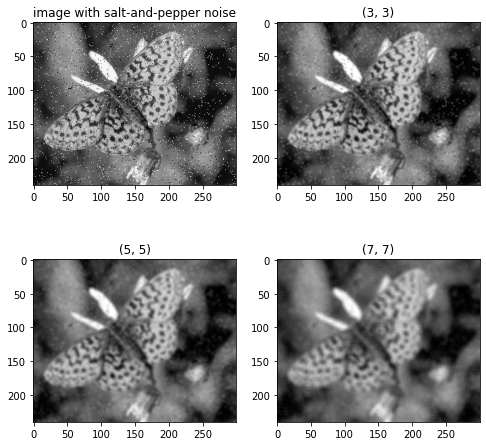

In [69]:
fig, axs = plt.subplots(2,2,figsize=(8,8))
salt = cv2.cvtColor(cv2.imread('salt.jpg'), cv2.COLOR_BGR2GRAY)
plt.subplot(2,2,1)
plt.title('image with salt-and-pepper noise')
plt.imshow(salt, cmap='gray')
side = 3
for x in range(3):
    after = cv2.blur(salt,(side,side))
    plt.subplot(2,2,x+2)
    plt.title(f'({side}, {side})')
    plt.imshow(after, cmap='gray')
    side +=2


* Szum ulega zmiejszeniu kosztem rozmycia krawędzi i utraty szczegółów, ale nadal jest trudny do usunięcie przez ten typ filtra

### 8.2 nieliniowego filtra medianowego

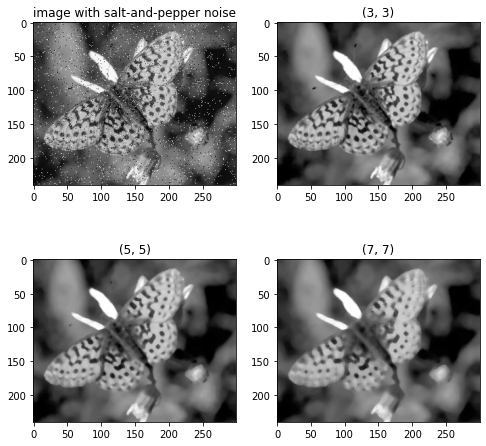

In [78]:
fig, axs = plt.subplots(2,3,figsize=(8,8))
salt = cv2.cvtColor(cv2.imread('salt.jpg'), cv2.COLOR_BGR2GRAY)
plt.subplot(2,2,1)
plt.title('image with salt-and-pepper noise')
plt.imshow(salt, cmap='gray')
side = 3
for x in range(3):
    after = cv2.medianBlur(salt,side)
    if side == 3:
        plt.imsave('butterfly.jpg', after, format='jpg',cmap='gray')
    plt.subplot(2,2,x+2)
    plt.title(f'({side}, {side})')
    plt.imshow(after, cmap='gray')
    side +=2

- filtr usuwa detale o rozmiarze proporcjonalnym do promienia jego sąsiedztwa, zatem jest filtrem dolnoprzepustowym
- filtr nie rozmywa krawędzi
- tworzy obszary o stałej jasności, bez faktury
- dobrze usuwa szum typu "sól i pieprz"

## Ćwiczenie 9 - Zastosuj filtry górnoprzepustowe do wykrywania krawędzi na przykładowych obrazach.
### 9.1 Użyj filtra z maską Sobela do wykrywania krawędzi.


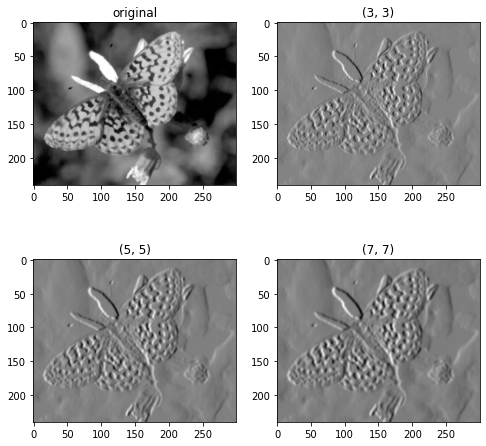

In [107]:
fig, axs = plt.subplots(2,3,figsize=(8,8))
img = cv2.cvtColor(cv2.imread('butterfly.jpg'), cv2.COLOR_BGR2GRAY)
plt.subplot(2,2,1)
plt.title('original')
plt.imshow(img, cmap='gray')
side = 3
for x in range(3):
    after = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=side) # sobel X
    plt.subplot(2,2,x+2)
    plt.title(f'({side}, {side})')
    plt.imshow(after, cmap='gray')
    side +=2

### 9.2 Zaobserwuj działanie Laplasjanu do wyostrzania szczegółów.



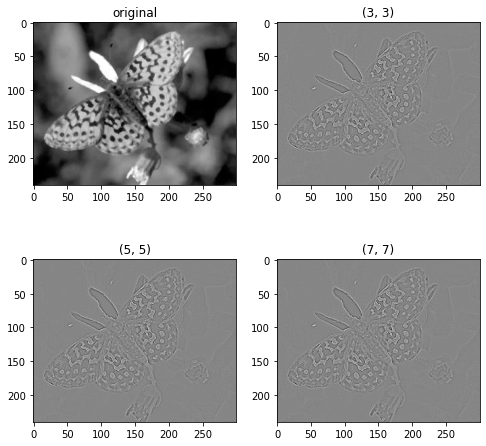

In [108]:
fig, axs = plt.subplots(2,3,figsize=(8,8))
img = cv2.cvtColor(cv2.imread('butterfly.jpg'), cv2.COLOR_BGR2GRAY)
plt.subplot(2,2,1)
plt.title('original')
plt.imshow(img, cmap='gray')
side = 3
for x in range(3):
    after = cv2.Laplacian(img,cv2.CV_64F) 
    plt.subplot(2,2,x+2)
    plt.title(f'({side}, {side})')
    plt.imshow(after, cmap='gray')
    side +=2

In [109]:
cv2.Laplacian?

Docstring:
Laplacian(src, ddepth[, dst[, ksize[, scale[, delta[, borderType]]]]]) -> dst
.   @brief Calculates the Laplacian of an image.
.   
.   The function calculates the Laplacian of the source image by adding up the second x and y
.   derivatives calculated using the Sobel operator:
.   
.   \f[\texttt{dst} =  \Delta \texttt{src} =  \frac{\partial^2 \texttt{src}}{\partial x^2} +  \frac{\partial^2 \texttt{src}}{\partial y^2}\f]
.   
.   This is done when `ksize > 1`. When `ksize == 1`, the Laplacian is computed by filtering the image
.   with the following \f$3 \times 3\f$ aperture:
.   
.   \f[\vecthreethree {0}{1}{0}{1}{-4}{1}{0}{1}{0}\f]
.   
.   @param src Source image.
.   @param dst Destination image of the same size and the same number of channels as src .
.   @param ddepth Desired depth of the destination image.
.   @param ksize Aperture size used to compute the second-derivative filters. See #getDerivKernels for
.   details. The size must be positive and odd.
.   @param s